In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mnist=tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
len(np.unique(y_test))

10

In [ ]:
#normalisation
x_train=x_train/255.0
x_test=x_test/255.0

In [ ]:
model1=tf.keras.Sequential()

In [ ]:


model1.add(tf.keras.Input(shape=(28,28,1)))
model1.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) , strides=2))
model1.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) , strides=2))
model1.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding="valid"))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) , strides=2))
model1.add(tf.keras.layers.Flatten())

In [ ]:
model1.add(tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer"))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

In [ ]:
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

cnn1= model1.fit(x_train, y_train, batch_size = 20, epochs = 10, validation_split = 0.1)

Epoch 1/10
2700/2700 [==============================] - 20s 3ms/step - loss: 0.1930 - accuracy: 0.9396 - val_loss: 0.0677 - val_accuracy: 0.9788
Epoch 2/10
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0700 - accuracy: 0.9782 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 3/10
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0491 - accuracy: 0.9849 - val_loss: 0.0538 - val_accuracy: 0.9843
Epoch 4/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.0390 - accuracy: 0.9877 - val_loss: 0.0390 - val_accuracy: 0.9903
Epoch 5/10
2700/2700 [==============================] - 10s 4ms/step - loss: 0.0299 - accuracy: 0.9899 - val_loss: 0.0417 - val_accuracy: 0.9885
Epoch 6/10
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0521 - val_accuracy: 0.9855
Epoch 7/10
2700/2700 [==============================] - 9s 3ms/step - loss: 0.0195 - accuracy: 0.9938 - val_loss: 0.0613 - val_accura

TRAINING ACCURACY - 99.8%

In [ ]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0508 - accuracy: 0.9885


[0.050789594650268555, 0.9884999990463257]

TESTING ACCURACY-98.8%

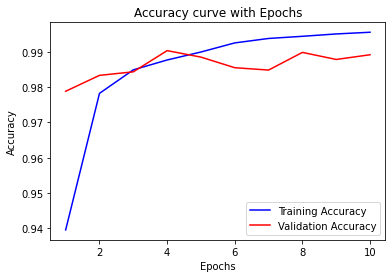

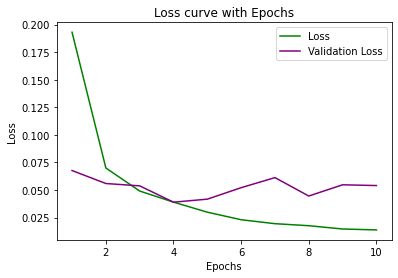

In [ ]:
# Plotting and Visualising



l5acc = cnn1.history["accuracy"]

l5val_acc = cnn1.history["val_accuracy"]

l5lss = cnn1.history["loss"]

l5val_lss = cnn1.history["val_loss"]

epochs_list = [1,2,3,4,5,6,7,8,9,10]



plt.plot(epochs_list, l5acc, 'blue', label='Training Accuracy')

plt.plot(epochs_list, l5val_acc, 'red', label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy curve with Epochs')

plt.legend()

plt.show()



#Loss Plot

plt.plot(epochs_list, l5lss, 'green', label="Loss")

plt.plot(epochs_list, l5val_lss, 'purple', label="Validation Loss")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss curve with Epochs')

plt.legend()

plt.show()

In [ ]:
lenet = tf.keras.models.Sequential()
lenet.add(tf.keras.Input(shape=(28,28,1)))
lenet.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'))#C1
lenet.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #S2
lenet.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=1, activation='tanh', padding='same'))#C3
lenet.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #S4

lenet.add(tf.keras.layers.Flatten()) #Flatten    
lenet.add(tf.keras.layers.Dense(128,activation="tanh",name="HiddenLayer1"))
lenet.add(tf.keras.layers.Dense(84,activation="tanh",name="HiddenLayer2"))

lenet.add(tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer"))


In [ ]:
lenet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 128)              

In [ ]:
lenet.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

lenet1 = lenet.fit(x_train, y_train, batch_size = 20, epochs = 10, validation_split = 0.2)

Epoch 1/10
2400/2400 [==============================] - 9s 3ms/step - loss: 0.1511 - accuracy: 0.9544 - val_loss: 0.0734 - val_accuracy: 0.9787
Epoch 2/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0589 - accuracy: 0.9819 - val_loss: 0.0659 - val_accuracy: 0.9798
Epoch 3/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0505 - val_accuracy: 0.9847
Epoch 4/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.0477 - val_accuracy: 0.9863
Epoch 5/10
2400/2400 [==============================] - 9s 4ms/step - loss: 0.0242 - accuracy: 0.9923 - val_loss: 0.0546 - val_accuracy: 0.9846
Epoch 6/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0527 - val_accuracy: 0.9867
Epoch 7/10
2400/2400 [==============================] - 8s 3ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0541 - val_accuracy:

TRAINING ACCURACY- 99.5%

In [ ]:
lenet.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0472 - accuracy: 0.9871


[0.047207463532686234, 0.9871000051498413]

TESTING ACCURACY- 98%

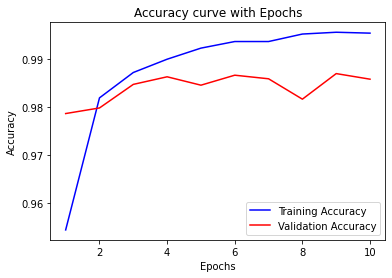

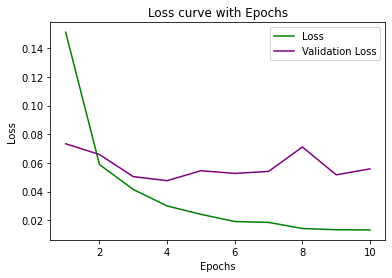

In [ ]:
# Plotting and Visualising



l5acc = lenet1.history["accuracy"]

l5val_acc = lenet1.history["val_accuracy"]

l5lss = lenet1.history["loss"]

l5val_lss = lenet1.history["val_loss"]

epochs_list = [1,2,3,4,5,6,7,8,9,10]



plt.plot(epochs_list, l5acc, 'blue', label='Training Accuracy')

plt.plot(epochs_list, l5val_acc, 'red', label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy curve with Epochs')

plt.legend()

plt.show()



#Loss Plot

plt.plot(epochs_list, l5lss, 'green', label="Loss")

plt.plot(epochs_list, l5val_lss, 'purple', label="Validation Loss")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss curve with Epochs')

plt.legend()

plt.show()

In [ ]:
#CIFAR10

In [33]:
cifar=tf.keras.datasets.cifar10

In [34]:
(X_train,Y_train),(X_test,Y_test)=cifar.load_data()

In [35]:
X_train=X_train/255.0
X_test=X_test/255.0

In [36]:
model3=tf.keras.Sequential()
model3.add(tf.keras.Input(shape=(32,32,3)))
model3.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation="relu" , padding= "same"))
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2) , strides=1))

model3.add(tf.keras.layers.Flatten())

In [37]:
model3.add(tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer1"))
model3.add(tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer"))

In [38]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 30752)             0         
                                                                 
 HiddenLayer1 (Dense)        (None, 100)               3075300   
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 3,077,206
Trainable params: 3,077,206
Non-trainable params: 0
____________________________________________

In [39]:
model3.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

cnn2 = model3.fit(X_train, Y_train, batch_size = 20, epochs = 15, validation_split = 0.1)

Epoch 1/15
2250/2250 [==============================] - 8s 3ms/step - loss: 1.4744 - accuracy: 0.4776 - val_loss: 1.2586 - val_accuracy: 0.5578
Epoch 2/15
2250/2250 [==============================] - 7s 3ms/step - loss: 1.1626 - accuracy: 0.5939 - val_loss: 1.1492 - val_accuracy: 0.6018
Epoch 3/15
2250/2250 [==============================] - 7s 3ms/step - loss: 1.0550 - accuracy: 0.6307 - val_loss: 1.0961 - val_accuracy: 0.6194
Epoch 4/15
2250/2250 [==============================] - 7s 3ms/step - loss: 0.9811 - accuracy: 0.6545 - val_loss: 1.0681 - val_accuracy: 0.6296
Epoch 5/15
2250/2250 [==============================] - 7s 3ms/step - loss: 0.9220 - accuracy: 0.6779 - val_loss: 1.0874 - val_accuracy: 0.6282
Epoch 6/15
2250/2250 [==============================] - 7s 3ms/step - loss: 0.8688 - accuracy: 0.6961 - val_loss: 1.1369 - val_accuracy: 0.6250
Epoch 7/15
2250/2250 [==============================] - 7s 3ms/step - loss: 0.8193 - accuracy: 0.7108 - val_loss: 1.0710 - val_accuracy:

TRAINING ACCURACY-81.3%

In [40]:
model3.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4667 - accuracy: 0.5963


[1.4666887521743774, 0.5963000059127808]

TESTING ACCURACY-59.6%

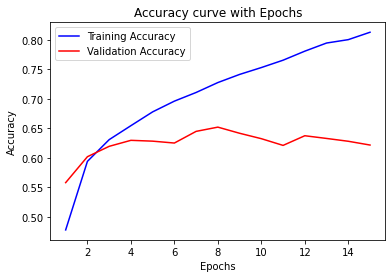

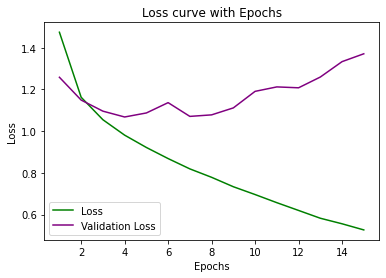

In [42]:
# Plotting and Visualising



l5acc = cnn2.history["accuracy"]

l5val_acc = cnn2.history["val_accuracy"]

l5lss = cnn2.history["loss"]

l5val_lss = cnn2.history["val_loss"]

epochs_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]



plt.plot(epochs_list, l5acc, 'blue', label='Training Accuracy')

plt.plot(epochs_list, l5val_acc, 'red', label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy curve with Epochs')

plt.legend()

plt.show()



#Loss Plot

plt.plot(epochs_list, l5lss, 'green', label="Loss")

plt.plot(epochs_list, l5val_lss, 'purple', label="Validation Loss")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss curve with Epochs')

plt.legend()

plt.show()

In [43]:
lenet1 = tf.keras.models.Sequential()
lenet1.add(tf.keras.Input(shape=(32,32,3)))
lenet1.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), strides=1,  activation='tanh', input_shape=X_train[0].shape, padding='same'))#C1
lenet1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #S2
lenet1.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), strides=1, activation='tanh', padding='same'))#C3
lenet1.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #S4

lenet1.add(tf.keras.layers.Flatten()) #Flatten    
lenet1.add(tf.keras.layers.Dense(120,activation="tanh",name="HiddenLayerr1"))
lenet1.add(tf.keras.layers.Dense(84,activation="tanh",name="HiddenLayerr2")) 
lenet1.add(tf.keras.layers.Dense(10,activation="softmax",name="OutputLayerr"))

In [44]:
lenet1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1024)              0         
                                                                 
 HiddenLayerr1 (Dense)       (None, 120)              

In [45]:
lenet1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

lenet2 = lenet1.fit(X_train, Y_train, batch_size = 20, epochs = 20, validation_split = 0.2)

Epoch 1/20
2000/2000 [==============================] - 9s 4ms/step - loss: 1.5110 - accuracy: 0.4606 - val_loss: 1.3169 - val_accuracy: 0.5274
Epoch 2/20
2000/2000 [==============================] - 7s 4ms/step - loss: 1.2101 - accuracy: 0.5740 - val_loss: 1.1781 - val_accuracy: 0.5876
Epoch 3/20
2000/2000 [==============================] - 7s 4ms/step - loss: 1.0788 - accuracy: 0.6221 - val_loss: 1.1055 - val_accuracy: 0.6139
Epoch 4/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.9771 - accuracy: 0.6575 - val_loss: 1.0626 - val_accuracy: 0.6291
Epoch 5/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.8854 - accuracy: 0.6894 - val_loss: 1.1056 - val_accuracy: 0.6157
Epoch 6/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.7985 - accuracy: 0.7190 - val_loss: 1.0951 - val_accuracy: 0.6181
Epoch 7/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.7238 - accuracy: 0.7472 - val_loss: 1.1107 - val_accuracy:

Training accuracy-93%

In [46]:
lenet1.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0230 - accuracy: 0.5923


[2.0230445861816406, 0.5922999978065491]

Testing accuracy-59%

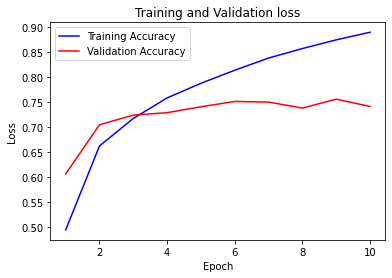

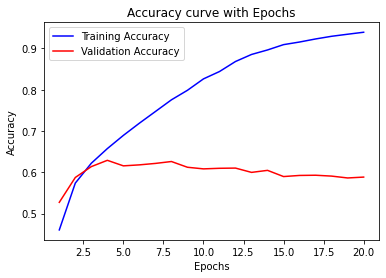

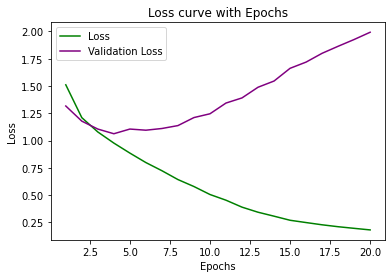

In [47]:
# Plotting and Visualising



l5acc = lenet2.history["accuracy"]

l5val_acc = lenet2.history["val_accuracy"]

l5lss = lenet2.history["loss"]

l5val_lss = lenet2.history["val_loss"]

epochs_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]



plt.plot(epochs_list, l5acc, 'blue', label='Training Accuracy')

plt.plot(epochs_list, l5val_acc, 'red', label='Validation Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.title('Accuracy curve with Epochs')

plt.legend()

plt.show()



#Loss Plot

plt.plot(epochs_list, l5lss, 'green', label="Loss")

plt.plot(epochs_list, l5val_lss, 'purple', label="Validation Loss")

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.title('Loss curve with Epochs')

plt.legend()

plt.show()

SUMMARY

On MNIST

Lenet-5 gives better test accuracy (59.6%)

CNN model gives better training accuracy (81.3%)

On CIFAR-10 dataset

CNN Model gives better test accuracy (59.6%)

Lenet-5 Architecture gives better training accuracy (93%)